In [2]:
import numpy as np
import scipy as sp
from scipy import stats
from scipy import special

import pandas as pd
pd.set_option('display.width', 200)
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

import os
import subprocess
import warnings
warnings.filterwarnings('ignore')

/Users/kazufusa/.anyenv/envs/pyenv/versions/3.6.4/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/kazufusa/.anyenv/envs/pyenv/versions/3.6.4/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [15]:
# 2変量正規分布の95%区間を作図する関数
def add_ellipse_CI95(p, mean, cov, **kwargs):
    # http://www.visiondummy.com/2014/04/draw-error-ellipse-representing-covariance-matrix/
    w, v = np.linalg.eig(cov)
    v1 = v[:, np.argmax(w)]
    angle = 180. / np.pi * np.arctan(v1[1]/v1[0])
    width = 2 * np.sqrt(np.max(w) * 5.991)
    height = 2 * np.sqrt(np.min(w) * 5.991)
    e = matplotlib.patches.Ellipse(mean, width, height, angle=angle, **kwargs)
    print(e)
    p.add_artist(e)

In [44]:
mu = np.array([0, 0])
cov = np.array([[5,2],[2,5]])

Ellipse(xy=(0, 0), width=12.951756637614837, height=8.478915024930961, angle=44.99999999999999)


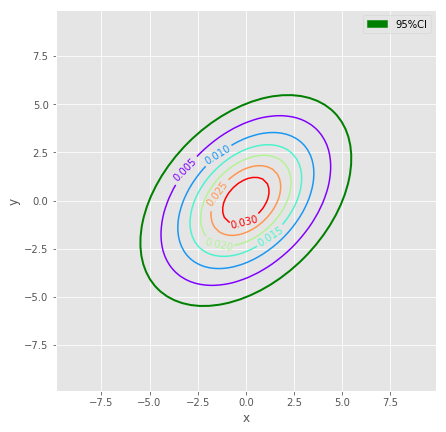

In [45]:
fig, ax = plt.subplots(ncols=1, figsize=(9, 7))

ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')

delta = 0.25
xrange = np.array([-10, 10])
yrange = np.array([-10, 10])
gx = np.arange(*(xrange + delta/2), delta)
gy = np.arange(*(yrange + delta/2), delta)
gxx, gyy = np.meshgrid(gx, gy)
gxgy = np.c_[gxx.ravel(), gyy.ravel()]

# parameters of posterior predictive distribution
zz = sp.stats.multivariate_normal.pdf(gxgy, mu, cov)

im = ax.contour(
    zz.reshape(len(gx), len(gy)), 
    interpolation='none', 
    origin='lower',
    extent=list(xrange) + list(yrange),
    cmap=matplotlib.cm.rainbow
)
ax.clabel(im, inline=1, fontsize=10)
add_ellipse_CI95(ax, mu, cov, fc='none', ls='solid', ec='g', lw='2.')
g = matplotlib.patches.Patch(color='g', label='95%CI')
ax.legend(handles=[g])
# plt.savefig('4.png', bbox_inches='tight', pad_inches=0);

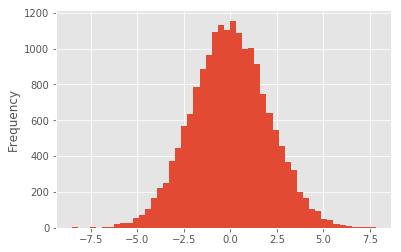

In [79]:
# conditional distribution(y|x=0)
samples = pd.DataFrame(sp.stats.multivariate_normal.rvs(mu, cov, 1000000), columns=['x', 'y'])
samples[(-0.05 <= samples.x) & (samples.x <= 0.05)].y.plot.hist(bins=50)